In [1]:
import numpy as np
import matplotlib.pyplot as plt
Lambda_0 = 3.33102731

In [2]:
file_model= 'GRASP_DATA/Model_confirmation/'
file_gopo = 'GRASP_DATA/GO_POvsPO_PO/'
file_mom = 'GRASP_DATA/BoR_MoM_Lens_only/'
file_AR = 'GRASP_DATA/BoR_MoM_lens_AR/'

1. Model comparison

In [3]:
DATA = np.genfromtxt(file_model + 'Jon_model_GOPOanalysis_lens_only.dat',skip_header=6, delimiter = ',')
Theta_1 = DATA[:,0]
Model_jon = DATA[:,1]
DATA = np.genfromtxt(file_model + 'GOPO_Lens_only.dat',skip_header=6, delimiter = ',')
Theta_2 = DATA[:,0]
Model_mine = DATA[:,1]

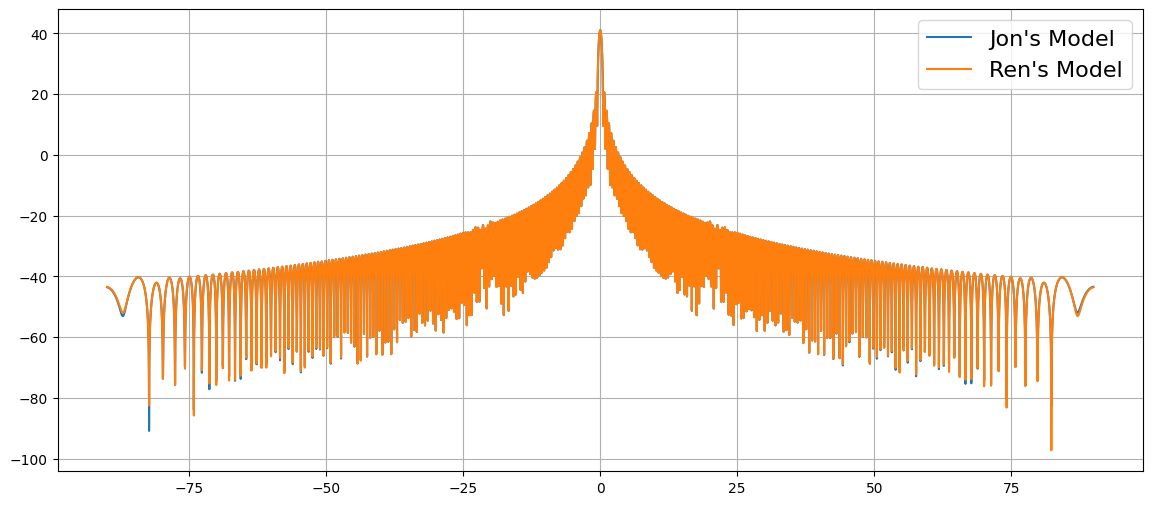

In [11]:
fig = plt.figure(figsize= (14,6))
plt.plot(Theta_1,Model_jon,label='Jon\'s Model')
plt.plot(Theta_2,Model_mine,label = 'Ren\'s Model')
plt.grid()
plt.legend(fontsize= 16)
plt.show()

2. GO-PO vs PO-PO

In [8]:

DATA = np.genfromtxt(file_gopo + 'PO_PO_only_lens.dat',skip_header=6, delimiter = ',')
Theta_3 = DATA[:,0]
Model_POPO = DATA[:,1]

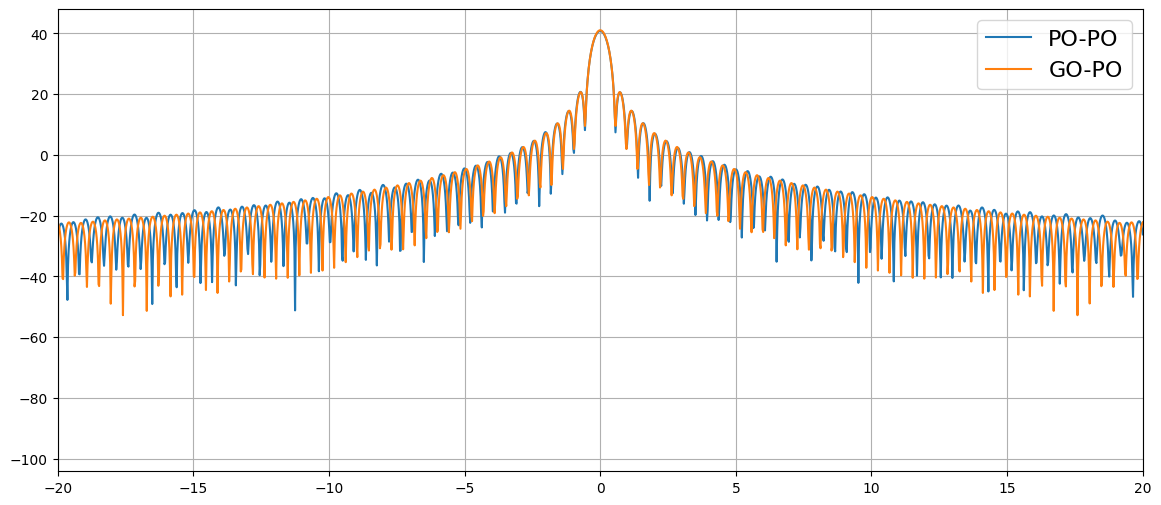

In [13]:
fig = plt.figure(figsize= (14,6))
plt.plot(Theta_3,Model_POPO,label = 'PO-PO')
plt.plot(Theta_2,Model_mine,label='GO-PO')
plt.grid()
plt.legend(fontsize = 16)
plt.xlim([-20,20])
plt.show()

3. POPO vs MoM

In [14]:
DATA = np.genfromtxt(file_mom + 'BoR_lens_only_no_AR.dat',skip_header=6, delimiter = ',')
Theta_4 = DATA[:,0]
Model_MoM = DATA[:,1]

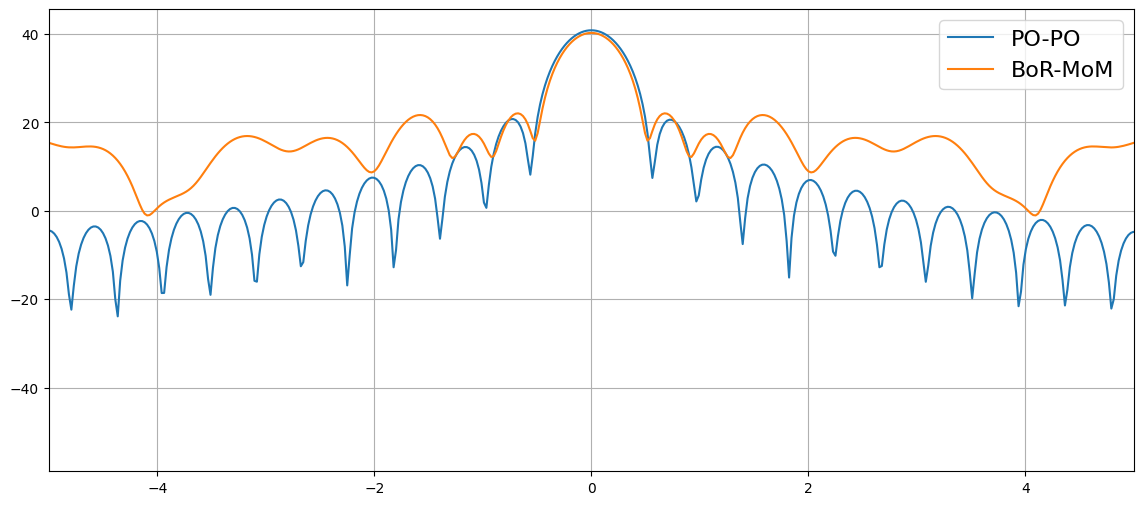

In [21]:
fig = plt.figure(figsize= (14,6))
plt.plot(Theta_3,Model_POPO,label = 'PO-PO')
plt.plot(Theta_4,Model_MoM,label='BoR-MoM')
plt.grid()
plt.legend(fontsize = 16)
plt.xlim([-5,5])
plt.show()

4. Anti-reflection Coating

In [16]:
DATA = np.genfromtxt(file_AR+ 'BoR_MoM_lens_only_AR.dat',skip_header=6, delimiter = ',')
Theta_5 = DATA[:,0]
Model_MoM_AR = DATA[:,1]

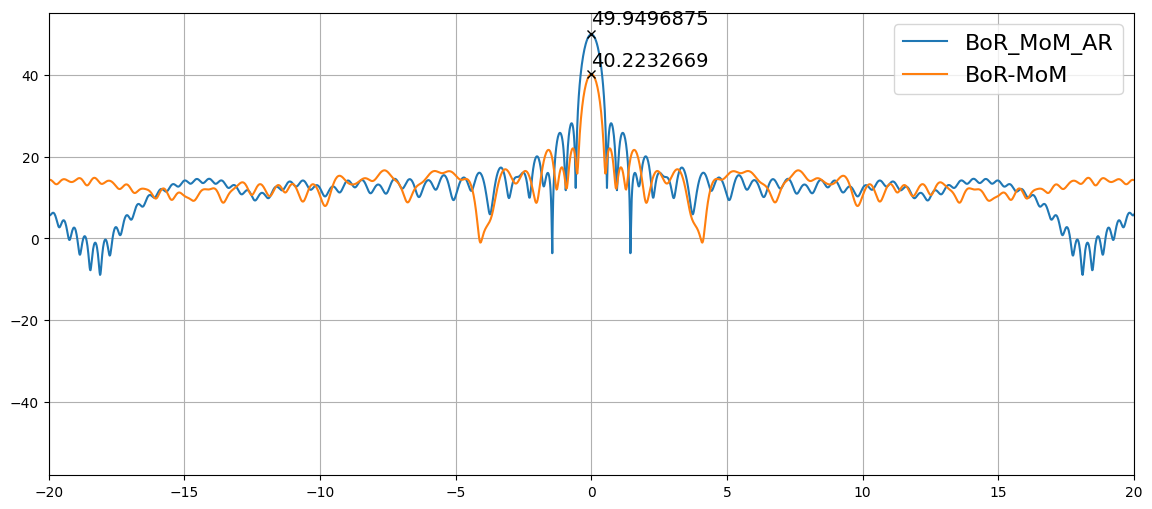

In [23]:
fig = plt.figure(figsize= (14,6))

plt.plot(Theta_5,Model_MoM_AR,label = 'BoR_MoM_AR')
plt.plot(Theta_4,Model_MoM,label='BoR-MoM')
plt.plot(0,Model_MoM_AR.max(),'kx')
plt.text(0,Model_MoM_AR.max()*1.05,Model_MoM_AR.max(),fontsize=14)
plt.plot(0,Model_MoM.max(),'kx')
plt.text(0,Model_MoM.max()*1.05,Model_MoM.max(),fontsize=14)
plt.grid()
plt.legend(fontsize = 16)
plt.xlim([-20,20])
plt.show()

In [ ]:
def FT_far(x,y,Field,Lambda):
    X = x/Lambda
    Y = y/Lambda
    dx = np.abs(X[0]-X[1])
    dy = np.abs(Y[0]-Y[1])
    theta_x = np.fft.fftshift(np.fft.fftfreq(x.size, d=dx))
    theta_y = np.fft.fftshift(np.fft.fftfreq(y.size, d=dy))
    beam = np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(Field)))
    return theta_x, theta_y, beam